In [1]:
!pip install opencv-python


In [2]:
!pip install matplotlib

All the neccessary libraries and dependencies are installed 

In [1]:
import cv2
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow_hub as hub

Here I am extracting the model because model is downloaded in .tar  format

In [2]:
import tarfile

# Specify the path to your .tar file
tar_file_path = 'Downloads/mobilenet-v2-tensorflow1-openimages-v4-ssd-mobilenet-v2-v1.tar.gz'
# Specify the directory to extract to
extract_to_directory = 'Downloads/extracted_model'

# Open the tar file
with tarfile.open(tar_file_path, 'r') as tar:
    # Extract all contents to the specified directory
    tar.extractall(path=extract_to_directory)

print(f'Files extracted to {extract_to_directory}')


C:\Users\User\AppData\Local\Temp\ipykernel_15440\613961747.py:11: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_to_directory)


Files extracted to Downloads/extracted_model


Now I will load the model which is ssd mobileNet model which is trained on coco dataset

In [3]:
pb_file_path='Downloads/extracted_model'
model = tf.saved_model.load(pb_file_path).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Now I will load the image on which i want to perform object detection 

In [33]:
image_path='Downloads/kevin-gent-DIZBFTl7c-A-unsplash.jpg'
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_tensor = tf.convert_to_tensor(cv2.imread(image_path) / 255.0, dtype=tf.float32)[tf.newaxis, :]

In the below step I have given my image tensor to model to predict or detect the object features and output is our detection for the image 

In [13]:
output=model(image_tensor)

In [14]:
output

{'detection_class_labels': <tf.Tensor: shape=(100,), dtype=int64, numpy=
 array([333,  51, 514, 434, 434, 433, 308, 434, 434, 434, 228, 434, 434,
        434, 391, 434, 391, 391,  58, 253, 391, 433, 391, 434, 391, 391,
        391, 485, 391, 434, 391, 391, 434, 391, 434, 391, 391, 391, 391,
        434, 485, 391, 391, 391, 434, 434, 434, 434, 434, 485, 391, 391,
        433, 391,  69, 434, 391, 391, 391, 391, 391, 391, 391, 434, 391,
        434, 485, 391, 434, 391, 391, 434, 391, 434, 391, 391, 391, 391,
        485, 391, 391, 434, 485, 434, 391, 391, 434,  69, 391, 391, 391,
        434, 391, 391, 391, 391, 485, 434, 485, 391], dtype=int64)>,
 'detection_class_names': <tf.Tensor: shape=(100,), dtype=string, numpy=
 array([b'/m/05r655', b'/m/01bl7v', b'/m/0fly7', b'/m/09j5n', b'/m/09j5n',
        b'/m/09j2d', b'/m/04yx4', b'/m/09j5n', b'/m/09j5n', b'/m/09j5n',
        b'/m/03bt1vf', b'/m/09j5n', b'/m/09j5n', b'/m/09j5n', b'/m/07j7r',
        b'/m/09j5n', b'/m/07j7r', b'/m/07j7r', b'/m

The output has manly four categories: detection class entities, detection scores, detection class labels, detection boxes

Now I have to make a function which displays a rectangular box around the object detected 

In [32]:
## function to draw rectangle around object
def drawbox(image,ymin,xmin,ymax,xmax,label):
    im_height,im_width,_=image.shape
    left,top,right,bottom=int(xmin*im_width),int(ymin*im_height),int(xmax*im_width),int(ymax*im_height)
    cv2.rectangle(image,(left,top),(right,bottom),color=(255,0,0),thickness=10)
     
    # Set label position and draw background rectangle
    label_position = (left, top - 10)
    background_color = (0, 0, 128)  # Background color for the label
    cv2.rectangle(image, (left, top - 120), (left + 600, top), background_color, -1)  # Filled rectangle for text background
     
    # Put the label text on the image
    label=label
    text_color = (255, 255, 255)  # White color for the text
    font_scale = 3
    fontFace = cv2.FONT_HERSHEY_SIMPLEX
    thickness = 3
    cv2.putText(image, label, label_position,fontFace,font_scale, text_color, thickness)

In [16]:
##another function to make boxes around object
def draw(image,boxes,classnames,scores):
    #boxesidx gives the values from boxex and scores which lie above or equal to threshold
    boxesidx=tf.image.non_max_suppression(boxes,scores, max_output_size=10,score_threshold=0.2)
    boxesidx=boxesidx.numpy()
    for i in range(len(boxesidx)):
        ymin,xmin,ymax,xmax=tuple(boxes[i])
        label="{}:{}".format(classnames[i],int(100*scores[i]))
        drawbox(image,ymin,xmin,ymax,xmax,label)
    return image
        

These below entities I need for the function output from our detection  

In [17]:
## these are entities i need from my model output to construct rectangle around object
boxes=output['detection_boxes'].numpy()
classnames_byte=output['detection_class_entities'].numpy()
classnames=[classnames.decode('ascii') for classnames in classnames_byte]
scores=output['detection_scores'].numpy()
image=image

Calling our function and storing it in a variable 

In [34]:
image_with_boxes=draw(image,boxes,classnames,scores)

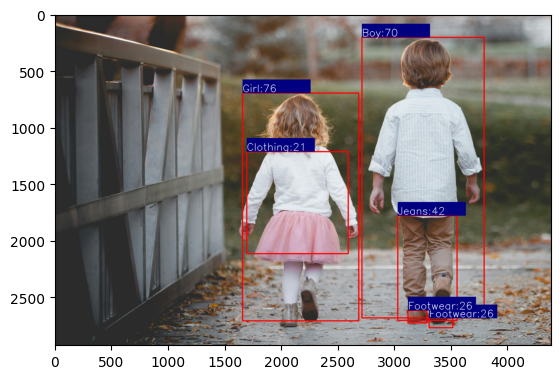

In [35]:
plt.imshow(image_with_boxes)

Saving the image after detection into our Downloads directory

In [36]:
import os
final_img=cv2.cvtColor(image_with_boxes,cv2.COLOR_BGR2RGB)
save_path = 'Downloads/detected_image'
if not os.path.exists(save_path):
    os.makedirs(save_path)

cv2.imwrite(os.path.join(save_path, 'final.jpg'), final_img)


True